# Capstone Project - The Battle of the Neighborhoods (Week 2)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction : Business Problem<a name="introduction"></a>

In this project we try to find a city in USA to set up an **import business** to sell fresh **Asian raw food** materials intended for restaurant use. 

Since there are a lot of cities in the states, we try to find the ones where we can get most of the business with the presence of Asian restaurants. We are also interested in finding what type of Asian restaurant do Americans usually prefer, Chinese, Japanese, Vietnamese, etc.

We will use data science to generate  the most promising city based on these criteria.  
 

# Data<a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* Total population and density in American cities
* Total number of  Asian restaurants in each of the cities
* Type of restaurant


Following data sources will be needed to extract/generate the required information:
* List of states, neighbourhoods in USA: https://simplemaps.com/data/us-zips
*  **Foursquare API** that provides location data for venues in a given neighbourhood: https://developer.foursquare.com/


# Methodology<a name="methodology"></a>

In the first step we extract information from a csv file containing data for all the counties, cities and states and select relevant columns to create a data frame of the fields we are interested in namely the state, city and their population and density. Pre-processing, grouping and sorting the data frame gives us the names of the cities we need.

In the second step, we use foursquare api to get venue data containing neighborhood, venue name, category and coordinates for each city and then filter out Asian Restaurants.

Thirdly we check which city has the largest number of restaurants and the type of food served in them. Lastly we cluster the restaurants based on neighborhood using unsupervised machine learning technique , K-Means. 


## First we find out the top ten most populous and dense cities

### Importing Necessary Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans 

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

import math

#print('Libraries imported.')## Import necessary libraries

In [2]:
# install wordcloud
#! pip3 install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

#print ('Wordcloud is installed and imported!')

In [3]:
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import matplotlib.pyplot as plt

In [5]:
import csv
import seaborn as sns

# Download and Explore Dataset 


In [6]:
#read csv file to get population and density values of all cities and countines 
df_data_1 = pd.read_csv(r'C:\Users\PSharan\Downloads\simplemaps_uszips_basicv1.77\uszips.csv')
df_data_1.head()


zip       lat       lng       city state_id   state_name  zcta  \
0  601  18.18005 -66.75218   Adjuntas       PR  Puerto Rico  True   
1  602  18.36074 -67.17519     Aguada       PR  Puerto Rico  True   
2  603  18.45440 -67.12201  Aguadilla       PR  Puerto Rico  True   
3  606  18.16721 -66.93828    Maricao       PR  Puerto Rico  True   
4  610  18.29032 -67.12244     Anasco       PR  Puerto Rico  True   

   parent_zcta  population  density  county_fips county_name  \
0          NaN     17113.0    102.7        72001    Adjuntas   
1          NaN     37751.0    476.0        72003      Aguada   
2          NaN     47081.0    574.9        72005   Aguadilla   
3          NaN      6392.0     58.3        72093     Maricao   
4          NaN     26686.0    286.9        72011      Añasco   

                                      county_weights  \
0                {"72001": "99.43", "72141": "0.57"}   
1                                   {"72003": "100"}   
2                                   {"72005": "100"}   
3  {"72093": "94.88", "72153": "3.78", "72121": "...   
4                {"72011": "99.45", "72003": "0.55"}   

              county_names_all    county_fips_all  imprecise  military  \
0              Adjuntas|Utuado        72001|72141      False     False   
1                       Aguada              72003      False     False   
2                    Aguadilla              72005      False     False   
3  Maricao|Yauco|Sabana Grande  72093|72153|72121      False     False   
4                Añasco|Aguada        72011|72003      False     False   

              timezone  
0  America/Puerto_Rico  
1  America/Puerto_Rico  
2  America/Puerto_Rico  
3  America/Puerto_Rico  
4  America/Puerto_Rico

In [7]:
#Creating New Dataframe with Relevant Features
city_df = df_data_1[['state_name','city','county_name','population','density','lat','lng']]

#Renaming Columns
city_df.rename(columns = {'county_name':'County','city':'City','state_name':'State','population':'Population','density':'Density','lat':'Latitude','lng':'Longitude'}, inplace = True)

C:\Users\PSharan\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### List of states and total number of cities in each state

In [8]:
x=city_df[['State','City']].groupby('State').count()

In [9]:
x.sort_values(by='City', ascending=False)

City
State                         
Texas                     1935
Pennsylvania              1795
New York                  1794
California                1761
Illinois                  1383
Ohio                      1195
Missouri                  1022
Michigan                   986
Florida                    981
Iowa                       934
Virginia                   896
Minnesota                  884
North Carolina             808
Indiana                    775
Wisconsin                  772
Kentucky                   767
Georgia                    735
West Virginia              706
Kansas                     697
Oklahoma                   648
Alabama                    642
Tennessee                  628
Washington                 596
New Jersey                 595
Arkansas                   591
Nebraska                   581
Massachusetts              537
Colorado                   525
Louisiana                  515
Maryland                   468
Maine                      432
South Carolina             424
Mississippi                423
Oregon                     417
Arizona                    405
North Dakota               383
South Dakota               371
New Mexico                 368
Montana                    361
Utah                       287
Connecticut                282
Idaho                      277
Vermont                    255
New Hampshire              248
Alaska                     238
Wyoming                    178
Nevada                     175
Puerto Rico                131
Hawaii                      94
Rhode Island                77
Delaware                    67
District of Columbia        52
Virgin Islands              11
Guam                         9
Northern Mariana Islands     3
American Samoa               1

## Finding the top 10 most populous cities 

In [10]:
#Defining Average function
def average (num):
    sumOfNumbers = 0
    for t in num:
        sumOfNumbers = sumOfNumbers + t

    avg = sumOfNumbers / len(num)
    return avg

In [11]:
# Grouping by city and aggregating population in each city 
pop_city = city_df.groupby('City').agg({
                                        'Population': sum,
                                         'Density' : average,

                                                            } )

#Sorting Values in Descending order
pop_city = pop_city.sort_values(by='Population', ascending=False)

#Choosing the top 50 most populous cities
city_50 = pop_city.head(50)

### Further sorting by density

In [12]:
#Sorting Values in Descending order
city_10 = city_50.sort_values(by='Density', ascending=False)

#Displaying the top 10 most populous cities
city= city_10.head(12)

# Adding bronx and brooklyn's population to nyc
city.iloc[0,0]= city.iloc[0,0] + city.iloc[1,0]+city.iloc[2,0]

#Averaging the density of nyc, bronx and brooklyn
num = [city.iloc[0,1],city.iloc[1,1],city.iloc[2,1]]
city.iloc[0,1]= average(num)

#Dropping Bronx and Brooklyn
city= city.drop(labels= ['Bronx','Brooklyn'], axis=0) #Bronx and Brooklyn are a part of NYC

#resetting index of the dataframe
city=city.reset_index()
city

C:\Users\PSharan\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PSharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PSharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



City  Population       Density
0       New York   5712078.0  17308.259372
1  San Francisco    875107.0   8160.925000
2        Chicago   2692662.0   6328.833929
3    Los Angeles   2467874.0   5527.210769
4   Philadelphia   1611568.0   5032.803774
5        Seattle    971465.0   3800.418421
6          Miami   1893623.0   2740.550794
7       San Jose   1051795.0   2551.760000
8     Washington    939289.0   2434.268000
9      Milwaukee    809038.0   2311.468966

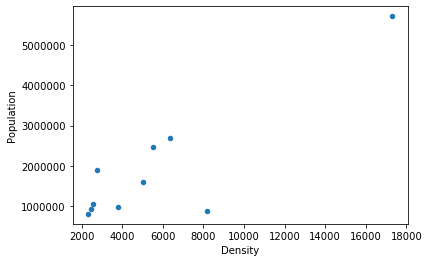

In [13]:
city.plot(kind='scatter',x='Density',y='Population')

## New York city has far more population and number of people living per square meter than any other city in america

In [14]:
# define the dataframe columns
column_names = ['State','City', 'County', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [15]:
list1= ['New York','San Francisco','Chicago','Los Angeles','Philadelphia','Seattle','Miami','San Jose','Washington','Milwaukee']
length=(len(city_df['State']))

In [16]:
for row in range(length):
          if city_df.loc[row,'City'] in list1:
            
            county = city_df.loc[row,'County']
            city = city_df.loc[row,'City']
            state = city_df.loc[row,'State']
            lat = city_df.loc[row,'Latitude']
            long = city_df.loc[row,'Longitude']

            neighborhoods = neighborhoods.append({'County': county ,
                                              'City': city,
                                              'State': state,
                                              'Latitude': lat,
                                              'Longitude': long }, ignore_index=True ) 
            

### Total number of counties in each city 

In [17]:
total_county =neighborhoods[['City','County']].groupby('City').count()
total_county.sort_values(by='County', ascending=False)

County
City                 
Washington         75
New York           69
Los Angeles        65
Miami              63
Chicago            56
Philadelphia       53
Seattle            38
San Jose           30
Milwaukee          29
San Francisco      28

In [18]:
print('Total Unique counties : {}'.format(len(neighborhoods['County'].unique())))

Total Unique counties : 43


In [19]:
city = neighborhoods.groupby(['City']) .agg(lambda x:x.value_counts().index[0]).reset_index()

In [20]:
# correcting coordinates for washington
add=city.iloc[9,0]

geolocator = Nominatim(user_agent="us_explorer")
location = geolocator.geocode(add)
latitude = location.latitude
longitude = location.longitude
    
#print(city.iloc[9,0])   

city.iloc[9,3]=latitude
city.iloc[9,4]=longitude

In [21]:
map_city = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, label in zip(city['Latitude'], city['Longitude'], city['City']):
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False) .add_to(map_city)
            
# add pop-up text to each marker on the map
latitudes = list(city['Latitude'])
longitudes = list( city['Longitude'])
labels = list(city['City'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_city)


map_city

### Connecting to Foursquare and getting venue data

Now we have the name of the cities and their locations, so now we can proceed to get the venue data from foursquare api for each city coordinate.

Since the the credentials of the account is not for a premium one, there is a limit to how many venues can be called for each city, over here the limit is 900.

In [22]:
# @hidden_cell

CLIENT_ID = '3YX3U0J4YXYUM3KYTSY3O1C52V3WE4E1FNQVGWKJ0EG4YZML' # your Foursquare ID
CLIENT_SECRET = '523FT405DGIRUQVH0RFTWAIBEOQGLIN0U3PPA2JPWBW2TFS2' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)/

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            #city,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [#'City'
                    'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Creating dataframe with venues from each city

In [26]:
venues = pd.DataFrame()

for i in range(10):
    
    #Getting coordinates from geopy for each city to use in foursquare
    address = city.iloc[i,0]

    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    #print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))
    
    
    ##
    radius = 500 # define radius

    # create URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        latitude, 
        longitude, 
        radius, 
        LIMIT)
    #print(url)
    
    #getting a json file from the foursquare api
    results = requests.get(url).json()
    #results

    listo = results['response']['groups'][0]['items']

    nearby_venues = json_normalize(listo) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues = nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    
    #create multiple data frames here
    ven = getNearbyVenues(#address,
                                    names=nearby_venues['name'],
                                   latitudes=nearby_venues['lat'],
                                   longitudes=nearby_venues['lng']
                                  )
    #add new column city to ven
    ven.insert(0, "City", address, True)

    venues= pd.concat([venues, ven])


C:\Users\PSharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



In [27]:
#del venues
#del ven
#del nearby_venues
venues.head()


City        Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Chicago  Auditorium Theatre              41.876058              -87.625303   
1  Chicago  Auditorium Theatre              41.876058              -87.625303   
2  Chicago  Auditorium Theatre              41.876058              -87.625303   
3  Chicago  Auditorium Theatre              41.876058              -87.625303   
4  Chicago  Auditorium Theatre              41.876058              -87.625303   

                                         Venue  Venue Latitude  \
0                           Auditorium Theatre       41.876058   
1                                     Cafecito       41.875724   
2  Osaka Sushi Express & Fresh Fruit Smoothies       41.876969   
3                                      Dunkin'       41.876814   
4             Hostelling International Chicago       41.875757   

   Venue Longitude    Venue Category  
0       -87.625303           Theater  
1       -87.626386  Cuban Restaurant  
2       -87.624534  Sushi Restaurant  
3       -87.624658        Donut Shop  
4       -87.626537            Hostel

In [28]:
print ( '''Total number of cities: {} \nTotal number of neighbourhoods: {} \nTotal number of venues {}'''.format(len(pd.unique(venues['City'])),len(pd.unique(venues['Neighborhood'])),venues.shape[0]))       

Total number of cities: 10 
Total number of neighbourhoods: 285 
Total number of venues 8507


### Counting total number of venues for each city

In [29]:
count_venue=venues[['City','Venue']].groupby('City').count()

In [30]:
count_venue=count_venue.sort_values('Venue',ascending= False)
count_venue

Venue
City                
Chicago          900
New York         900
Philadelphia     900
San Francisco    900
San Jose         900
Seattle          900
Washington       893
Miami            878
Los Angeles      826
Milwaukee        510

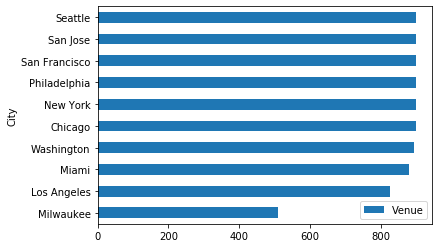

In [31]:
count_venue.sort_values('Venue').plot.barh()

## Venue Categories

In [32]:
print('There are {} uniques categories of venues.'.format(len(venues['Venue Category'].unique())))

There are 236 uniques categories of venues.


## One hot encoding

In [33]:
# one hot encoding
venues_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add city and neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues['Neighborhood'] 
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1]) # move neighborhood column to the first column
venues_onehot = venues_onehot[fixed_columns]

venues_onehot['City'] = venues['City']
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

City        Neighborhood  ATM  American Restaurant  Antique Shop  \
0  Chicago  Auditorium Theatre    0                    0             0   
1  Chicago  Auditorium Theatre    0                    0             0   
2  Chicago  Auditorium Theatre    0                    0             0   
3  Chicago  Auditorium Theatre    0                    0             0   
4  Chicago  Auditorium Theatre    0                    0             0   

   Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                 0            0           0                    0   
1                 0            0           0                    0   
2                 0            0           0                    0   
3                 0            0           0                    0   
4                 0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0                 0                   0           0                      0   
1                 0                   0           0                      0   
2                 0                   0           0                      0   
3                 0                   0           0                      0   
4                 0                   0           0                      0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bar  \
0                0          0           0           0       0    0   
1                0          0           0           0       0    0   
2                0          0           0           0       0    0   
3                0          0           0           0       0    0   
4                0          0           0           0       0    0   

   Baseball Field  Beer Bar  Bistro  Bookstore  Boutique  Boxing Gym  \
0               0         0       0          0         0           0   
1               0         0       0          0         0           0   
2               0         0       0          0         0           0   
3               0         0       0          0         0           0   
4               0         0       0          0         0           0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0                     0               0        0                0         0   
1                     0               0        0                0         0   
2                     0               0        0                0         0   
3                     0               0        0                0         0   
4                     0               0        0                0         0   

   Burger Joint  Burrito Place  Butcher  Cafeteria  Café  \
0             0              0        0          0     0   
1             0              0        0          0     0   
2             0              0        0          0     0   
3             0              0        0          0     0   
4             0              0        0          0     0   

   Cajun / Creole Restaurant  Candy Store  Caribbean Restaurant  Cheese Shop  \
0                          0            0                     0            0   
1                          0            0                     0            0   
2                          0            0                     0            0   
3                          0            0                     0            0   
4                          0            0                     0            0   

   Chinese Restaurant  Chocolate Shop  Churrascaria  Clothing Store  \
0                   0               0             0               0   
1                   0               0             0               0   
2                   0               0             0               0   
3                   0               0             0               0   
4                   0               0             0               0   

   Cocktail Bar  Coffee Shop  College Basketball Court  College Quad  \
0      

# Grouping by cities

In [34]:
venues_grouped = venues_onehot.groupby('City').mean().reset_index()
venues_grouped

City       ATM  American Restaurant  Antique Shop  \
0        Chicago  0.000000             0.010000      0.000000   
1    Los Angeles  0.000000             0.015738      0.000000   
2          Miami  0.000000             0.027335      0.000000   
3      Milwaukee  0.003922             0.064706      0.000000   
4       New York  0.000000             0.018889      0.022222   
5   Philadelphia  0.000000             0.023333      0.000000   
6  San Francisco  0.000000             0.000000      0.000000   
7       San Jose  0.000000             0.000000      0.000000   
8        Seattle  0.000000             0.005556      0.000000   
9     Washington  0.000000             0.053751      0.000000   

   Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0          0.011111     0.011111    0.031111             0.024444   
1          0.000000     0.016949    0.002421             0.001211   
2          0.000000     0.000000    0.000000             0.000000   
3          0.000000     0.003922    0.005882             0.000000   
4          0.000000     0.000000    0.000000             0.000000   
5          0.000000     0.008889    0.008889             0.021111   
6          0.000000     0.000000    0.007778             0.000000   
7          0.000000     0.033333    0.002222             0.000000   
8          0.000000     0.000000    0.002222             0.000000   
9          0.000000     0.000000    0.013438             0.000000   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0          0.014444            0.000000    0.000000               0.000000   
1          0.000000            0.002421    0.000000               0.000000   
2          0.006834            0.000000    0.000000               0.000000   
3          0.000000            0.000000    0.000000               0.000000   
4          0.013333            0.000000    0.001111               0.001111   
5          0.015556            0.000000    0.000000               0.000000   
6          0.002222            0.000000    0.000000               0.000000   
7          0.000000            0.000000    0.000000               0.000000   
8          0.000000            0.000000    0.000000               0.000000   
9          0.000000            0.000000    0.000000               0.000000   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop    Bakery       Bar  \
0         0.000000   0.000000    0.000000    0.000000  0.000000  0.004444   
1         0.000000   0.008475    0.000000    0.000000  0.031477  0.039952   
2         0.000000   0.000000    0.000000    0.000000  0.000000  0.000000   
3         0.007843   0.023529    0.000000    0.003922  0.003922  0.003922   
4         0.000000   0.000000    0.001111    0.012222  0.034444  0.000000   
5         0.000000   0.000000    0.000000    0.000000  0.050000  0.016667   
6         0.000000   0.000000    0.000000    0.007778  0.010000  0.001111   
7         0.000000   0.003333    0.000000    0.000000  0.022222  0.046667   
8         0.000000   0.030000    0.000000    0.000000  0.001111  0.006667   
9         0.000000   0.000000    0.000000    0.000000  0.000000  0.047032   

   Baseball Field  Beer Bar    Bistro  Bookstore  Boutique  Boxing Gym  \
0        0.001111  0.000000  0.000000   0.012222  0.002222        0.00   
1        0.000000  0.000000  0.000000   0.025424  0.036320        0.00   
2        0.000000  0.000000  0.025057   0.000000  0.000000        0.00   
3        0.000000  0.000000  0.000000   0.000000  0.000000        0.00   
4        0.000000  0.000000  0.000000   0.022222  0.000000        0.02   
5        0.000000  0.000000  0.000000   0.000000  0.000000        0.00   
6        0.000000  0.013333  0.000000   0.005556  0.027778        0.00   
7        0.000000  0.023333  0.000000   0.000000  0.000000        0.00   
8        0.000000  0.000000  0.000000   0.001111  0.001111        0.00   
9        0.000000  0.000000  0.000000   0.001120  0.000000        0.00   

   Brazilian R

# Listing the most common type of venue

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = venues_grouped['City']

for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

City 1st Most Common Venue 2nd Most Common Venue  \
0        Chicago           Pizza Place                Museum   
1    Los Angeles      Sushi Restaurant      Ramen Restaurant   
2          Miami    Italian Restaurant   Peruvian Restaurant   
3      Milwaukee                 Hotel           Coffee Shop   
4       New York           Coffee Shop    Falafel Restaurant   
5   Philadelphia                 Hotel                Bakery   
6  San Francisco     French Restaurant           Coffee Shop   
7       San Jose    Mexican Restaurant                   Pub   
8        Seattle          Cocktail Bar           Coffee Shop   
9     Washington                 Hotel           Coffee Shop   

           3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                    Coffee Shop                 Hotel          Concert Hall   
1            Japanese Restaurant           Supermarket                   Bar   
2                    Coffee Shop                 Hotel          Cocktail Bar   
3            American Restaurant           Pizza Place   Rental Car Location   
4                          Hotel     French Restaurant             Wine Shop   
5  Vegetarian / Vegan Restaurant           Coffee Shop                 Plaza   
6                   Cocktail Bar              Wine Bar          Concert Hall   
7                   Cocktail Bar        Sandwich Place        Ice Cream Shop   
8                          Hotel                  Café            Donut Shop   
9                         Garden   American Restaurant    Seafood Restaurant   

      6th Most Common Venue 7th Most Common Venue  8th Most Common Venue  \
0                Art Museum      Sushi Restaurant                Theater   
1                  Boutique                 Plaza                 Bakery   
2                   Theater            Print Shop       Greek Restaurant   
3                       Pub                Museum  Performing Arts Venue   
4                      Park  Gym / Fitness Center                 Bakery   
5  Mediterranean Restaurant            Steakhouse           Concert Hall   
6     Vietnamese Restaurant            Restaurant             Poke Place   
7                       Bar            Restaurant                  Plaza   
8                 BBQ Joint        Sandwich Place               Building   
9                       Bar             Hotel Bar                    Spa   

    9th Most Common Venue 10th Most Common Venue  
0              Donut Shop       Cuban Restaurant  
1      Mexican Restaurant         Breakfast Spot  
2      Chinese Restaurant         Breakfast Spot  
3              Steakhouse     Mexican Restaurant  
4            Burger Joint     Italian Restaurant  
5     American Restaurant           Churrascaria  
6  Furniture / Home Store            Men's Store  
7        Sushi Restaurant            Art Gallery  
8           Historic Site          Tour Provider  
9          Sandwich Place                  Plaza

## Creating a word cloud for the most common venues in all cities

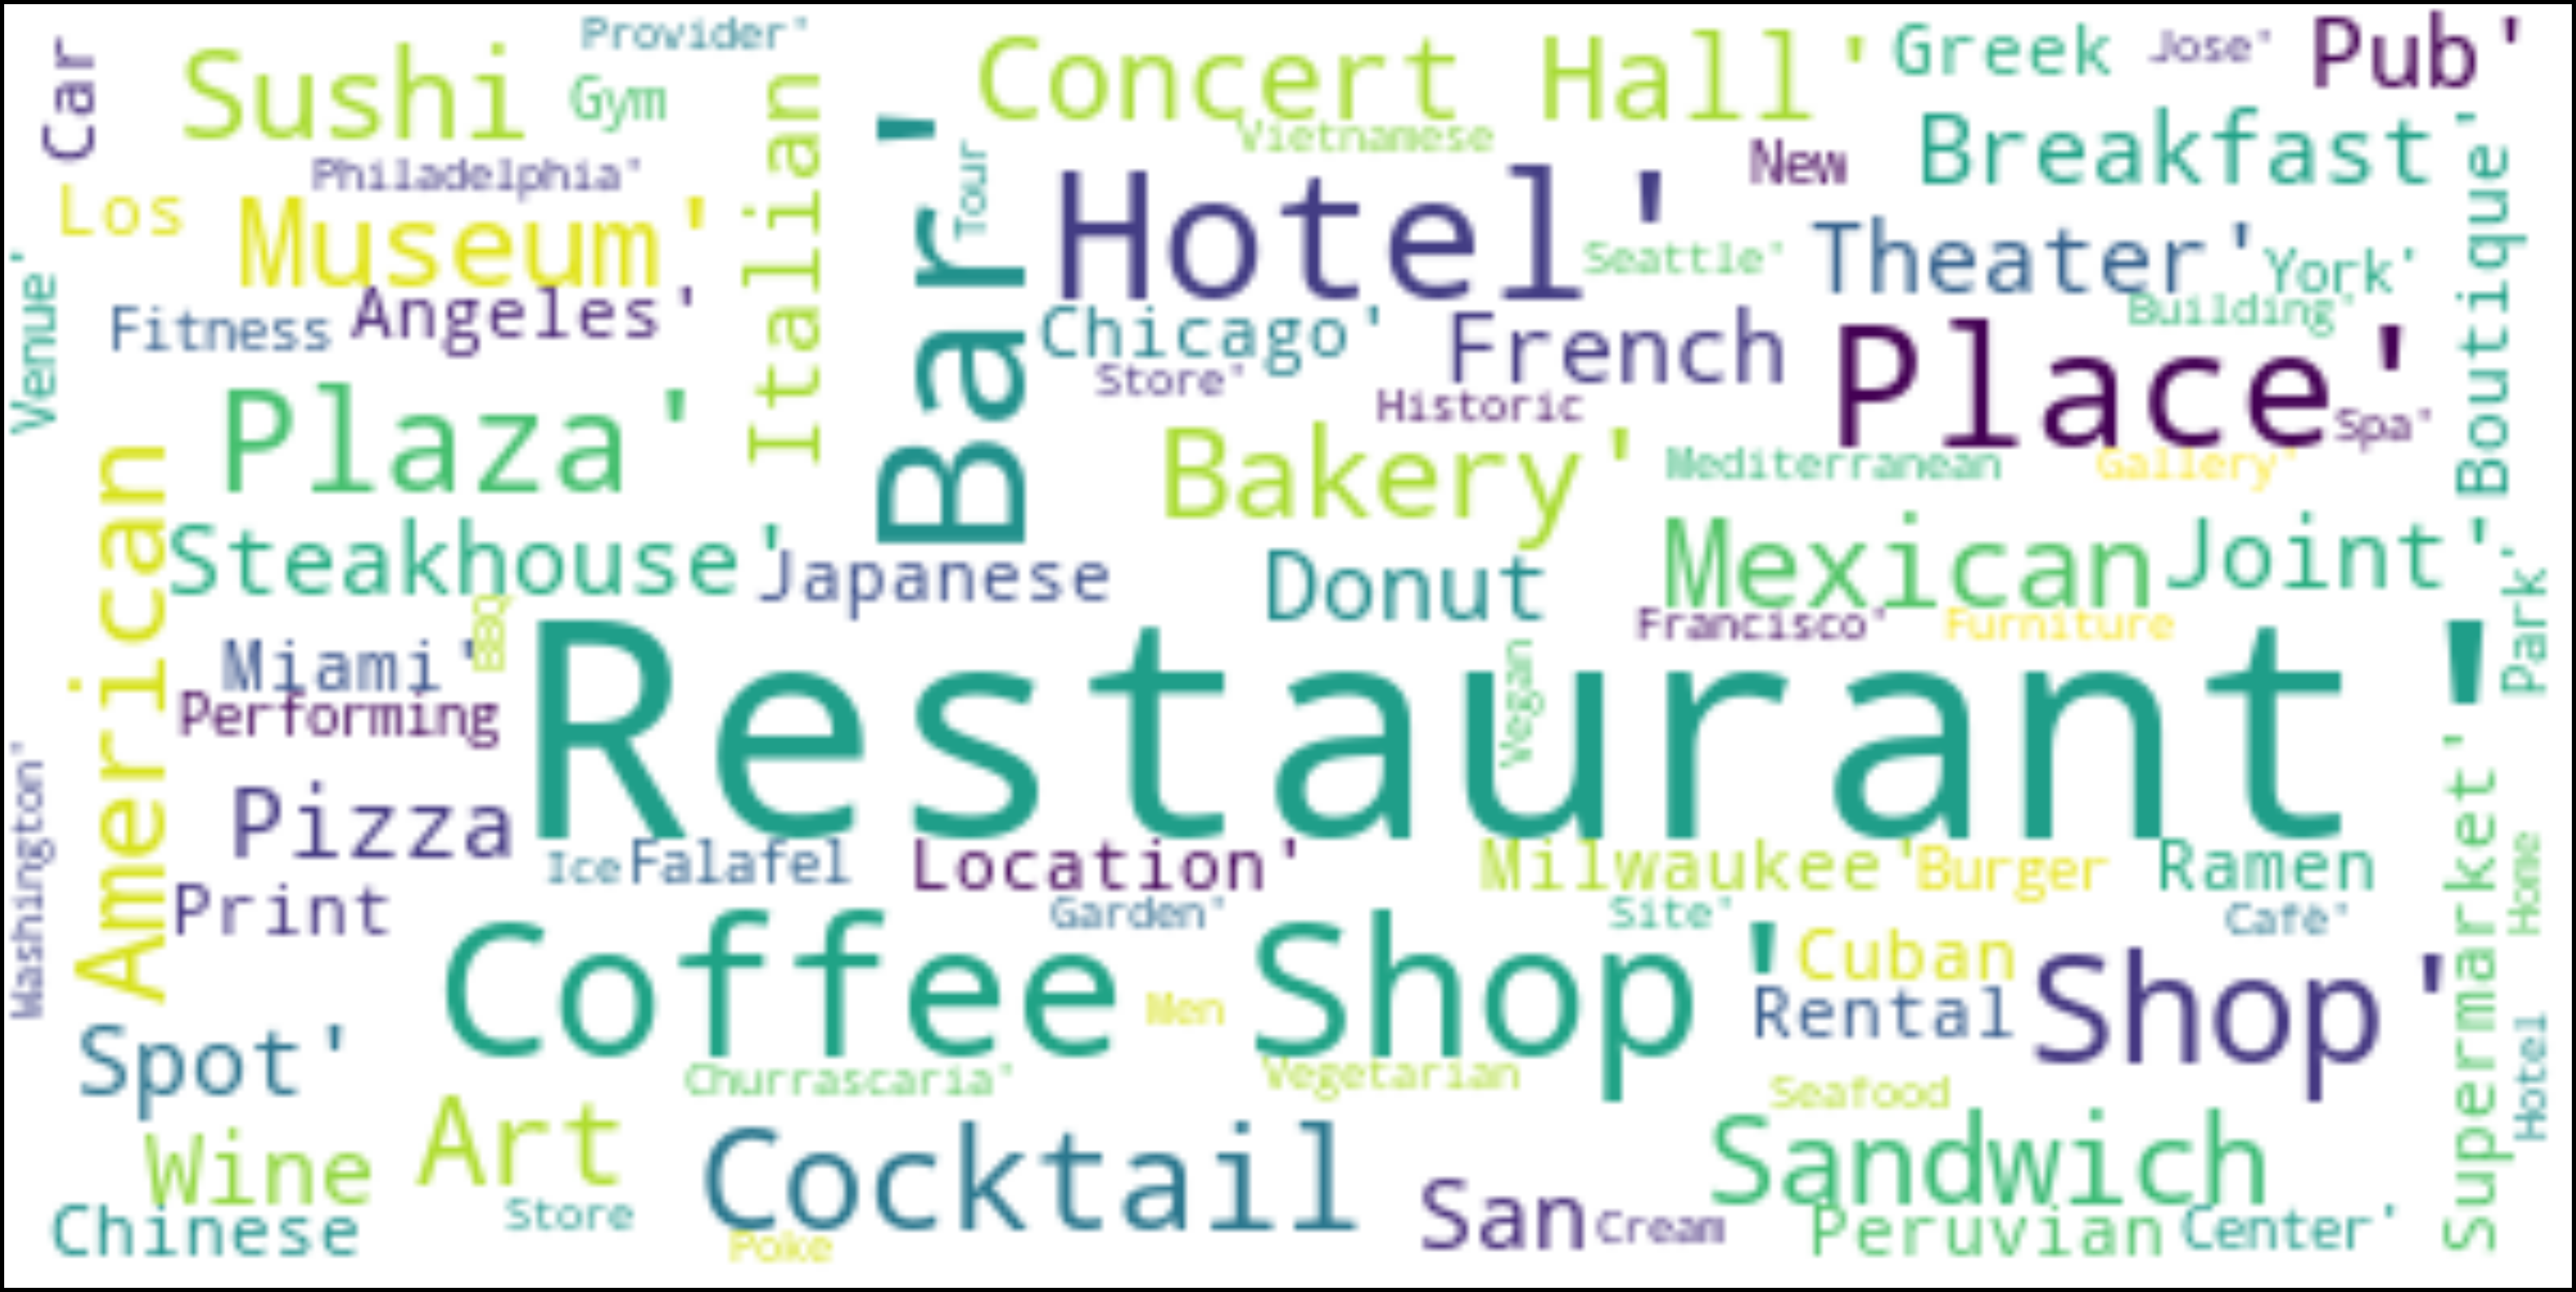

In [36]:
stopwords = set(STOPWORDS)

text = neighborhoods_venues_sorted.values

# instantiate a word cloud object
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
wc.generate(str(text))

fig = plt.figure(
    figsize = (60, 60),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Filtering Asian restaurants

In [37]:
a_list = [ "Asian Restaurant",
"Chinese Restaurant",
"Dim Sum Restaurant",
"Dumpling Restaurant",
"Filipino Restaurant",
"Indonesian Restaurant",
"Japanese Curry Restaurant",
"Japanese Restaurant",
"Ramen Restaurant",
"Shanghai Restaurant",
"Sushi Restaurant",
"Taiwanese Restaurant",
"Thai Restaurant",
"Udon Restaurant",
"Vietnamese Restaurant",
"Yoshoku Restaurant",
"Noodle House"]

In [41]:
#Create dataframe to count the number of restaurants in each city 
new_list= a_list.insert(0, 'City')      # uncomment when running program for the first time
a_df= pd.DataFrame(columns= new_list)  #uncomment when running program for the first time
a_df= pd.DataFrame(columns= a_list)
#a_df
a_df.head()

Empty DataFrame
Columns: [City, Asian Restaurant, Chinese Restaurant, Dim Sum Restaurant, Dumpling Restaurant, Filipino Restaurant, Indonesian Restaurant, Japanese Curry Restaurant, Japanese Restaurant, Ramen Restaurant, Shanghai Restaurant, Sushi Restaurant, Taiwanese Restaurant, Thai Restaurant, Udon Restaurant, Vietnamese Restaurant, Yoshoku Restaurant, Noodle House]
Index: []

In [42]:
#creating dataframe
a_df = venues_onehot[a_list].groupby('City').sum().reset_index()
a_df['Total']= a_df. sum(axis=1) # add a total column to sum up restaurants in each city
a_df

City  Asian Restaurant  Chinese Restaurant  Dim Sum Restaurant  \
0        Chicago                13                   0                   0   
1    Los Angeles                 0                   9                   3   
2          Miami                 6                  28                   0   
3      Milwaukee                 0                   0                   0   
4       New York                12                   0                   0   
5   Philadelphia                14                   4                   4   
6  San Francisco                 2                   0                   0   
7       San Jose                 0                   0                   0   
8        Seattle                 0                   6                   0   
9     Washington                 0                   0                   0   

   Dumpling Restaurant  Filipino Restaurant  Indonesian Restaurant  \
0                    0                    0                      0   
1                    0                    2                      0   
2                    0                    0                     25   
3                    0                    0                      0   
4                    0                    0                      0   
5                    0                    0                      0   
6                   13                    0                      0   
7                    0                    0                      0   
8                    1                    0                      0   
9                    0                    0                      0   

   Japanese Curry Restaurant  Japanese Restaurant  Ramen Restaurant  \
0                          0                    1                 0   
1                          0                   41                46   
2                          0                    3                 0   
3                          0                    0                 0   
4                          6                   16                 0   
5                          0                    0                 0   
6                          0                    0                24   
7                          0                    0                 0   
8                          0                    8                 0   
9                          0                    1                 0   

   Shanghai Restaurant  Sushi Restaurant  Taiwanese Restaurant  \
0                    0                28                     0   
1                    0                91                     0   
2                    0                 0                     0   
3                    0                 0                     0   
4                    0                14                     0   
5                    3                 0                     0   
6                    0                22                     0   
7                    0                32                     0   
8                    0                 9                     1   
9                    0                 0                     0   

   Thai Restaurant  Udon Restaurant  Vietnamese Restaurant  \
0                0                0                      0   
1                2               20                      0   
2                0                0                      0   
3                0                0                      2   
4                0                0                      0   
5               10                0                      0   
6                3                0                     29   
7                0                0                      0   
8                1                0                      0   
9                0                0                      0   

   Yoshoku Restaurant  Noodle House  Total  
0                   0             0     42  
1                  12             5    231  
2                   0             0     62  
3         

#  Analysis <a name="analysis"></a>

After creating a dataframe with asian restaurants in all the cities , we can start with the basic analysis.

In [43]:
print('Total number of asian restaurants in all cities is {}'.format(a_df['Total'].sum()))

Total number of asian restaurants in all cities is 590


## Visualizing total asian restaurants by city

In [48]:
a_df= a_df.sort_values('Total')
a_df

City  Asian Restaurant  Chinese Restaurant  Dim Sum Restaurant  \
7       San Jose                 0                   0                   0   
5   Philadelphia                14                   4                   4   
0        Chicago                13                   0                   0   
8        Seattle                 0                   6                   0   
4       New York                12                   0                   0   
2          Miami                 6                  28                   0   
6  San Francisco                 2                   0                   0   
1    Los Angeles                 0                   9                   3   

   Dumpling Restaurant  Filipino Restaurant  Indonesian Restaurant  \
7                    0                    0                      0   
5                    0                    0                      0   
0                    0                    0                      0   
8                    1                    0                      0   
4                    0                    0                      0   
2                    0                    0                     25   
6                   13                    0                      0   
1                    0                    2                      0   

   Japanese Curry Restaurant  Japanese Restaurant  Ramen Restaurant  \
7                          0                    0                 0   
5                          0                    0                 0   
0                          0                    1                 0   
8                          0                    8                 0   
4                          6                   16                 0   
2                          0                    3                 0   
6                          0                    0                24   
1                          0                   41                46   

   Shanghai Restaurant  Sushi Restaurant  Taiwanese Restaurant  \
7                    0                32                     0   
5                    3                 0                     0   
0                    0                28                     0   
8                    0                 9                     1   
4                    0                14                     0   
2                    0                 0                     0   
6                    0                22                     0   
1                    0                91                     0   

   Thai Restaurant  Udon Restaurant  Vietnamese Restaurant  \
7                0                0                      0   
5               10                0                      0   
0                0                0                      0   
8                1                0                      0   
4                0                0                      0   
2                0                0                      0   
6                3                0                     29   
1                2               20                      0   

   Yoshoku Restaurant  Noodle House  Total  
7                   0             0     32  
5                   0             0     35  
0                   0             0     42  
8                   0            18     44  
4                   0             0     48  
2                   0             0     62  
6                   0             0     93  
1                  12             5    231

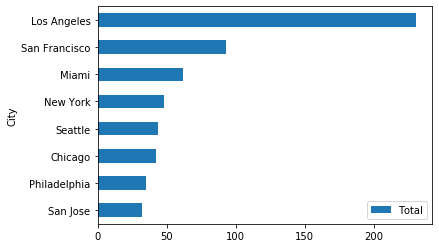

In [49]:
a_df.plot(kind='barh',x='City',y='Total')

Los Angeles has the much more restaurants than any other city , meanwhile Washington and Milwaukee have almost none in comparision.

### Dropping Milwaukee and Washington from the dataframe

In [51]:
#a_df=a_df.drop(labels= [3,9], axis=0) #uncomment when running for the first time
a_df= a_df.sort_values('Total', ascending = False)

Text(0.5, 1.0, 'Total Asian Restaurants')

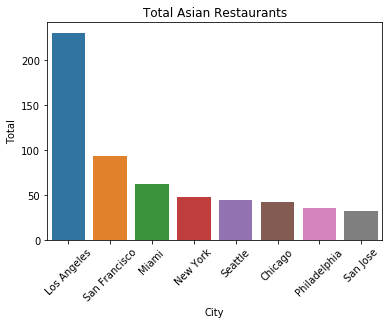

In [52]:
sbar=sns.barplot(x = 'City',
            y = 'Total',
            data = a_df)

for item in sbar.get_xticklabels():
    item.set_rotation(45)
    
sbar.set_title('Total Asian Restaurants')  

### Counting the category of restaurant in all cities

In [53]:
tp_count= a_df. sum(axis=0)
tp_count =tp_count.to_frame()
tp_count=tp_count.drop(labels=['City','Total'],axis=0)
tp_count=tp_count.sort_values(0,ascending=False).reset_index()
tp_count=tp_count.rename(columns={"index":"Category",0: "Count"})
tp_count

Category Count
0            Sushi Restaurant   196
1            Ramen Restaurant    70
2         Japanese Restaurant    69
3          Chinese Restaurant    47
4            Asian Restaurant    47
5       Vietnamese Restaurant    29
6       Indonesian Restaurant    25
7                Noodle House    23
8             Udon Restaurant    20
9             Thai Restaurant    16
10        Dumpling Restaurant    14
11         Yoshoku Restaurant    12
12         Dim Sum Restaurant     7
13  Japanese Curry Restaurant     6
14        Shanghai Restaurant     3
15        Filipino Restaurant     2
16       Taiwanese Restaurant     1

In [100]:
highest_count=tp_count.head(10)

In [101]:
labels=[]

for i in range(10):
    word = highest_count.loc[i,'Category']
    word= word.split()
    #labels[i]= word[0]
    labels.append(word[0])
    
#print(labels)
highest_count['category']= labels
highest_count

C:\Users\PSharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Category Count    category
0       Sushi Restaurant   196       Sushi
1       Ramen Restaurant    70       Ramen
2    Japanese Restaurant    69    Japanese
3     Chinese Restaurant    47     Chinese
4       Asian Restaurant    47       Asian
5  Vietnamese Restaurant    29  Vietnamese
6  Indonesian Restaurant    25  Indonesian
7           Noodle House    23      Noodle
8        Udon Restaurant    20        Udon
9        Thai Restaurant    16        Thai

Text(0.5, 1.0, 'Category of Restaurants')

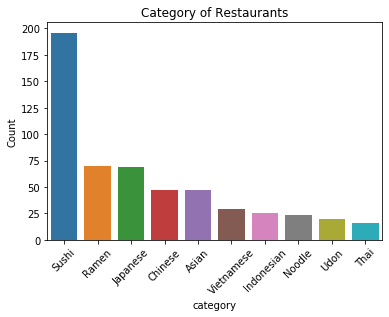

In [102]:
sbar=sns.barplot(x = 'category',
            y = 'Count',
            data = highest_count)

for item in sbar.get_xticklabels():
    item.set_rotation(45)
    
sbar.set_title('Category of Restaurants')

### Visualizing number of sushi restaurants 

Text(0.5, 1.0, 'Sushi Restaurants')

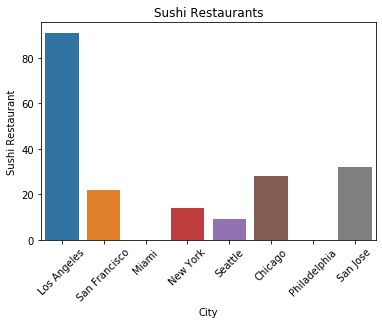

In [68]:
sbar=sns.barplot(x = 'City',
            y = 'Sushi Restaurant',
            data = a_df)

for item in sbar.get_xticklabels():
    item.set_rotation(45)
    
sbar.set_title('Sushi Restaurants') 

Sushi Restaurants are the most popular category of asian restaurants among all others. Most of the categories seem to come from Japanese cuisine. 
To Visualize which category comes from which cuisine, we can further group the above dataframe.
Categories that are names of a dish like noodle house will be in general category along with Asian Restaurant.

In [69]:
# creating list of cuisine type
values=pd.Series(['Japanese','Japanese','Japanese','General','Chinese','Vietnamese','Indonesian','Japanese','General','Thai','General','Japanese','General','Japanese','Chinese','Filipino','Taiwanese'])

#creating dataframe with cuisine type
df = pd.DataFrame(values,columns=['Cuisine'])
df =pd.concat([df,tp_count], axis=1)

df_c =df.groupby('Cuisine').count()
df_c =df_c .sort_values('Count',ascending=False)
df_c =df_c .drop('Count', axis=1).reset_index()
df_c 

Cuisine  Category
0    Japanese         6
1     General         4
2     Chinese         2
3    Filipino         1
4  Indonesian         1
5   Taiwanese         1
6        Thai         1
7  Vietnamese         1

### Total count of restaurants by cuisine type

In [70]:
df_g = df.groupby('Cuisine').sum()
df_g = df_g .drop('Category', axis=1)
df_g = df_g .sort_values('Count',ascending=False).reset_index()

df1 = df_g

# Calculate Percentage
df1['Percentage'] = (df1['Count'] / 
                      df1['Count'].sum()) * 100
#rounding values
df1['Percentage']=df1['Percentage'].round(decimals=2)

df1

Cuisine  Count  Percentage
0    Japanese    376       64.05
1     General     88       14.99
2     Chinese     50        8.52
3  Vietnamese     29        4.94
4  Indonesian     25        4.26
5        Thai     16        2.73
6    Filipino      2        0.34
7   Taiwanese      1        0.17

63.97% of the restaurants are of Japanese cuisine type whereas general category has 16.34% of the total asian restaurant.

In [82]:
# grouping the last three categories into one category, "Others"
df_pi=df1
count=0
percentage=0

for i in range(3):
    count= count+ df_pi.loc[i+5,'Count']
    percentage= percentage + df_pi.loc[i+5,'Percentage']
    
df_pi.loc[8] = ['Others',count, percentage]
df_pi= df_pi.drop(labels= [5,6,7], axis=0)
df_pi

Cuisine  Count  Percentage
0    Japanese    376       64.05
1     General     88       14.99
2     Chinese     50        8.52
3  Vietnamese     29        4.94
4  Indonesian     25        4.26
8      Others     19        3.24

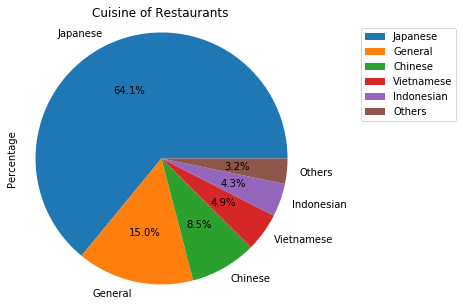

In [83]:
#Plotting a pie chart

mylabels=df_pi['Cuisine']
df_pi.plot.pie(y='Percentage',labels=mylabels, autopct='%1.1f%%', figsize=(5, 5))
plt.axis('equal')
plt.title('Cuisine of Restaurants')
plt.legend(bbox_to_anchor=(1.2, 1.0))
#plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.2, 1.0), fontsize=8) define patches
plt.show()

## Creating data frame of asian restaurant venues in LA

In [84]:
#Creating data frame for venues in la
condition= venues['City']=='Los Angeles' #filtering cities for la
nm=venues[condition]
nm.head()

la=nm.loc[nm['Venue Category'].isin(a_list)]   #filtering asian restaurants 
la.head()

City Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
37  Los Angeles     Badmaash              34.051342             -118.244571   
43  Los Angeles     Badmaash              34.051342             -118.244571   
44  Los Angeles     Badmaash              34.051342             -118.244571   
47  Los Angeles     Badmaash              34.051342             -118.244571   
61  Los Angeles      Redbird              34.050666             -118.244068   

                 Venue  Venue Latitude  Venue Longitude       Venue Category  
37         Rice & Nori       34.050060      -118.242344  Japanese Restaurant  
43         Sticky Rice       34.050693      -118.248789      Thai Restaurant  
44      Marugame Monzo       34.049807      -118.240202      Udon Restaurant  
47  Sari Sari Store LA       34.051065      -118.249390  Filipino Restaurant  
61         Rice & Nori       34.050060      -118.242344  Japanese Restaurant

In [85]:
print('Total number of asian restaurants in Los Angelees are {}'.format(la.shape[0]))

Total number of asian restaurants in Los Angelees are 231


In [86]:
print('List of neighborhoods in LA having the asiatique restaurants')
neighborhood=la['Neighborhood'].unique()
neighborhood

List of neighborhoods in LA having the asiatique restaurants


array(['Badmaash', 'Redbird', 'Kinokuniya Bookstore', 'JiST Cafe',
       'Fugetsu-Do Sweet Shop', 'Marukai Market', 'Birds & Bees',
       'LA Plaza de Cultura y Artes', 'Blue Whale Bar', "Mike's Deli",
       'Marugame Monzo', 'East West Players', 'Daikokuya',
       'Mitsuru Sushi and Grill', 'Rice & Nori', 'Tuesday Night Cafe',
       'Midori Matcha', 'Weller Court', 'My Ramen Bar',
       'Chinese American Museum', 'Starbucks', 'Orochon Ramen',
       'BOWLS LA', 'Quiznos', 'Fire House #1', 'Pico House'], dtype=object)

# Clustering the restaurants together based on neighborhood

In [87]:
# function to convert string values in dataframe to float
from sklearn import preprocessing
def convert(data):
    number = preprocessing.LabelEncoder()
   # data['City'] = number.fit_transform(data.City)
    data['Neighborhood'] = number.fit_transform(data.Neighborhood)
   # data['Venue'] = number.fit_transform(data.Venue)
    #data['Venue_Category'] = number.fit_transform(data.Venue_Category)
    
    
    data=data.fillna(-999)
    return data

In [88]:
la_r=la[['Neighborhood']]
train =convert(la_r)

C:\Users\PSharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
# set number of clusters
kclusters = 28 # total number of neighborhoods in our dataframe

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(train)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:28] 

C:\Users\PSharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (26) found smaller than n_clusters (28). Possibly due to duplicate points in X.



array([22, 22, 22, 22,  7,  7,  7,  7,  7,  7,  7,  7,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5, 12, 12, 12, 12, 12])

In [90]:
clustered_la=la

# add clustering labels
clustered_la.insert(0, 'Cluster Labels', kmeans.labels_) #uncomment when running the program for the first time

clustered_la # check the last columns!

Cluster Labels         City                 Neighborhood  \
37               22  Los Angeles                     Badmaash   
43               22  Los Angeles                     Badmaash   
44               22  Los Angeles                     Badmaash   
47               22  Los Angeles                     Badmaash   
61                7  Los Angeles                      Redbird   
64                7  Los Angeles                      Redbird   
72                7  Los Angeles                      Redbird   
75                7  Los Angeles                      Redbird   
76                7  Los Angeles                      Redbird   
77                7  Los Angeles                      Redbird   
78                7  Los Angeles                      Redbird   
81                7  Los Angeles                      Redbird   
82                5  Los Angeles         Kinokuniya Bookstore   
88                5  Los Angeles         Kinokuniya Bookstore   
90                5  Los Angeles         Kinokuniya Bookstore   
94                5  Los Angeles         Kinokuniya Bookstore   
97                5  Los Angeles         Kinokuniya Bookstore   
101               5  Los Angeles         Kinokuniya Bookstore   
102               5  Los Angeles         Kinokuniya Bookstore   
104               5  Los Angeles         Kinokuniya Bookstore   
105               5  Los Angeles         Kinokuniya Bookstore   
108               5  Los Angeles         Kinokuniya Bookstore   
111               5  Los Angeles         Kinokuniya Bookstore   
112              12  Los Angeles                    JiST Cafe   
118              12  Los Angeles                    JiST Cafe   
125              12  Los Angeles                    JiST Cafe   
126              12  Los Angeles                    JiST Cafe   
127              12  Los Angeles                    JiST Cafe   
130              12  Los Angeles                    JiST Cafe   
132              12  Los Angeles                    JiST Cafe   
133              12  Los Angeles                    JiST Cafe   
136              12  Los Angeles                    JiST Cafe   
137              12  Los Angeles                    JiST Cafe   
138              12  Los Angeles                    JiST Cafe   
140              12  Los Angeles                    JiST Cafe   
142              18  Los Angeles        Fugetsu-Do Sweet Shop   
146              18  Los Angeles        Fugetsu-Do Sweet Shop   
152              18  Los Angeles        Fugetsu-Do Sweet Shop   
158              18  Los Angeles        Fugetsu-Do Sweet Shop   
161              18  Los Angeles        Fugetsu-Do Sweet Shop   
162              18  Los Angeles        Fugetsu-Do Sweet Shop   
163              18  Los Angeles        Fugetsu-Do Sweet Shop   
164              18  Los Angeles        Fugetsu-Do Sweet Shop   
166              18  Los Angeles        Fugetsu-Do Sweet Shop   
170              18  Los Angeles        Fugetsu-Do Sweet Shop   
171              18  Los Angeles        Fugetsu-Do Sweet Shop   
172               2  Los Angeles               Marukai Market   
178               2  Los Angeles               Marukai Market   
180               2  Los Angeles               Marukai Market   
184               2  Los Angeles               Marukai Market   
186               2  Los Angeles               Marukai Market   
190               2  Los Angeles               Marukai Market   
191               2  Los Angeles               Marukai Market   
192               2  Los Angeles               Marukai Market   
194               2  Los Angeles               Marukai Market   
200               2  Los Angeles               Marukai Market   
201               2  Los Angeles               Marukai Market   
208               3  Los Angeles                 Birds & Bees   
212               3  Los Angeles                 Birds & Bees   
250              25  Los Angeles  LA Plaza de Cultura y Artes   
251              25  Los Angeles  LA Pla

In [ ]:
#clustered_la =clustered_la.drop('Cluster Labels',1)
#la =la.drop('Cluster Labels',1)

### Examine first five cluster

### Cluster 0

In [91]:
clustered_la.loc[clustered_la['Cluster Labels'] == 0,clustered_la.columns[[2]+[0] + list(range(5, clustered_la.shape[1]))]]

Neighborhood  Cluster Labels                        Venue  Venue Latitude  \
789   Pico House               0         Long's Family Pastry       34.060328   
791   Pico House               0  Phoenix Inn Chinese Cuisine       34.060129   
793   Pico House               0                  ABC Seafood       34.060071   
796   Pico House               0                   Lucky Deli       34.060485   
797   Pico House               0                      Okiboru       34.059588   

     Venue Longitude      Venue Category  
789      -118.237781  Chinese Restaurant  
791      -118.238735  Chinese Restaurant  
793      -118.238377  Dim Sum Restaurant  
796      -118.239234  Chinese Restaurant  
797      -118.239771    Ramen Restaurant

### Cluster 1 

In [92]:
clustered_la.loc[clustered_la['Cluster Labels'] == 1, clustered_la.columns[[2] + list(range(5, clustered_la.shape[1]))]]

Neighborhood                        Venue  Venue Latitude  \
760  Fire House #1         Long's Family Pastry       34.060328   
762  Fire House #1  Phoenix Inn Chinese Cuisine       34.060129   
763  Fire House #1                  ABC Seafood       34.060071   
767  Fire House #1                   Lucky Deli       34.060485   
769  Fire House #1                      Okiboru       34.059588   

     Venue Longitude      Venue Category  
760      -118.237781  Chinese Restaurant  
762      -118.238735  Chinese Restaurant  
763      -118.238377  Dim Sum Restaurant  
767      -118.239234  Chinese Restaurant  
769      -118.239771    Ramen Restaurant

### Cluster 2

In [93]:
clustered_la.loc[clustered_la['Cluster Labels'] == 2, clustered_la.columns[[2] + list(range(5, clustered_la.shape[1]))]]

Neighborhood                     Venue  Venue Latitude  \
172  Marukai Market            Marugame Monzo       34.049807   
178  Marukai Market                 Daikokuya       34.049914   
180  Marukai Market                Hama Sushi       34.048527   
184  Marukai Market       Zencu Sushi & Grill       34.049178   
186  Marukai Market  Kura Revolving Sushi Bar       34.048684   
190  Marukai Market                    Komasa       34.048499   
191  Marukai Market              Mitsuru Cafe       34.048959   
192  Marukai Market   Mitsuru Sushi and Grill       34.050066   
194  Marukai Market              Suehiro Cafe       34.049717   
200  Marukai Market              Rakkan Ramen       34.049447   
201  Marukai Market                Sushi Enya       34.049700   

     Venue Longitude       Venue Category  
172      -118.240202      Udon Restaurant  
178      -118.240095     Ramen Restaurant  
180      -118.240500     Sushi Restaurant  
184      -118.240654     Sushi Restaurant  
186      -118.240673     Sushi Restaurant  
190      -118.240424  Japanese Restaurant  
191      -118.240001  Japanese Restaurant  
192      -118.240620     Sushi Restaurant  
194      -118.239989   Yoshoku Restaurant  
200      -118.239528     Ramen Restaurant  
201      -118.239743     Sushi Restaurant

### Cluster 3

In [94]:
clustered_la.loc[clustered_la['Cluster Labels'] == 3, clustered_la.columns[[2] + list(range(5, clustered_la.shape[1]))]]

Neighborhood               Venue  Venue Latitude  Venue Longitude  \
208  Birds & Bees  Sari Sari Store LA       34.051065      -118.249390   
212  Birds & Bees         Sticky Rice       34.050693      -118.248789   

          Venue Category  
208  Filipino Restaurant  
212      Thai Restaurant

### Cluster 4

In [95]:
clustered_la.loc[clustered_la['Cluster Labels'] == 4, clustered_la.columns[[2] + list(range(5, clustered_la.shape[1]))]]

Neighborhood                               Venue  Venue Latitude  \
472  Tuesday Night Cafe                      Marugame Monzo       34.049807   
477  Tuesday Night Cafe                           Daikokuya       34.049914   
485  Tuesday Night Cafe                 Zencu Sushi & Grill       34.049178   
486  Tuesday Night Cafe                          Hama Sushi       34.048527   
487  Tuesday Night Cafe                        Rakkan Ramen       34.049447   
490  Tuesday Night Cafe                        Mitsuru Cafe       34.048959   
492  Tuesday Night Cafe                              Oomasa       34.049294   
493  Tuesday Night Cafe             Mitsuru Sushi and Grill       34.050066   
496  Tuesday Night Cafe  Chinchikurin Hiroshima Okonomiyaki       34.049464   
497  Tuesday Night Cafe                        Suehiro Cafe       34.049717   
498  Tuesday Night Cafe                          Sushi Enya       34.049700   
500  Tuesday Night Cafe            Kura Revolving Sushi Bar       34.048684   

     Venue Longitude       Venue Category  
472      -118.240202      Udon Restaurant  
477      -118.240095     Ramen Restaurant  
485      -118.240654     Sushi Restaurant  
486      -118.240500     Sushi Restaurant  
487      -118.239528     Ramen Restaurant  
490      -118.240001  Japanese Restaurant  
492      -118.239678     Sushi Restaurant  
493      -118.240620     Sushi Restaurant  
496      -118.239715  Japanese Restaurant  
497      -118.239989   Yoshoku Restaurant  
498      -118.239743     Sushi Restaurant  
500      -118.240673     Sushi Restaurant

### checking cluster labels and respective neighbourhood

In [96]:
# creating list of neighborhoods according to clustered 
from scipy import stats

label_c=clustered_la[['Cluster Labels','Neighborhood']].groupby('Cluster Labels').agg(pd.Series.mode)#.reset_index()#.to_frame()
label_list= label_c['Neighborhood']
label_list

Cluster Labels
0                      Pico House
1                   Fire House #1
2                  Marukai Market
3                    Birds & Bees
4              Tuesday Night Cafe
5            Kinokuniya Bookstore
7                         Redbird
8                       Daikokuya
9                        BOWLS LA
10                   My Ramen Bar
11              East West Players
12                      JiST Cafe
13                      Starbucks
14                 Blue Whale Bar
15                  Midori Matcha
16                   Weller Court
17                  Orochon Ramen
18          Fugetsu-Do Sweet Shop
19                    Rice & Nori
20        Mitsuru Sushi and Grill
21                 Marugame Monzo
22                       Badmaash
23        Chinese American Museum
24                        Quiznos
25    LA Plaza de Cultura y Artes
27                    Mike's Deli
Name: Neighborhood, dtype: object

# Visualizing restaurants with cluster labels on a map

In [97]:
add='Los Angeles'

geolocator = Nominatim(user_agent="us_explorer")
location = geolocator.geocode(add)
latitude = location.latitude
longitude = location.longitude

print (location,latitude,longitude)

Los Angeles, California, United States 34.0536909 -118.242766


In [98]:
# create map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start= 15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(clustered_la['Venue Latitude'], clustered_la['Venue Longitude'], clustered_la['Venue'], clustered_la['Cluster Labels']):
    #label = folium.Popup(str(poi) + ' ,' + str(label_list[cluster]), parse_html=True)
    label = folium.Popup(str(poi), parse_html=True)
    
    #converting nan and float cluster values to integers for indexing 
    c_1=cluster-1
    if math.isnan(c_1) :
            c_1= 0     #assinging mode value to nan
    else:
        c_1= round(c_1)-1
        
   # print (c_1)
     
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = rainbow[c_1],
        fill=True,
        fill_color=rainbow[c_1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [99]:
from folium import plugins

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(clustered_la['Venue Latitude'], clustered_la['Venue Longitude'], clustered_la['Neighborhood'], clustered_la['Cluster Labels']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(incidents)

    
map_clusters

# Results and Discussion <a name="results"></a>

From the 8571 venues obtained from the Foursquare API for the most densely populated cities of America, most belonged to the category of restaurants. The other categories in the list were that of other eating and drinking outlets like coffee shops, bars, etc. as well as hotels, museums and others.

From among these venues, 658 venues were in the category of 'Asian Restaurants'. And within these **Sushi** Restaurants were the most popular type of Asian food.

Most of these Restaurants were in **Los Angeles** where they had 276 Asian Restaurants of which 100 were sushi bistros and others were ramen restaurants and Japanese restaurant. All three categories belong to Japanese cuisine. The second place that had the most Asian restaurants was San Francisco with 96 restaurants and the category being preferred were Vietnamese, ramen and sushi.

**Japanese** cuisine seemed popular more than others overall with sushi being the most popular choice. Other categories included in the Japanese cuisine were ramen, Udon, Yoshuku, Japanese curry and an Japanese restaurant. There were also restaurants labelled as Asian Restaurants too with no particular country specific cuisine.
64 % of the 658 restaurants found in these cities belonged to Japanese cuisine,<br>
16.3% belonged to general asian category<br>
7.5% Chinese,<br>
4.9% Vietnamese,<br>
4.1% Indonesian and<br>
3.2% others.<br>
Focusing on Los Angeles where most of our venues were, 28 unique Neighborhoods were found where the 276 restaurants were. Upon Plotting them on the map they were found to be pretty close to each other and were mostly centered around '**Little Tokyo**' and '**New Chinatown**'.


## Conclusion <a name="conclusion"></a>

The cities on the western coast of USA prefer asian cuisine much more than the cities on the eastern coast. Amongst them Los Angeles had 276 restaurants with sushi being the most favourite type of food. Their most popular cuisine was Japanese that also included dishes like ramen, udon, etc.
The restaurants of the same cuisine were present very close to each other in the same neighborhood within the city.

Second to LA, San Francisco had 96 Asian Restaurants with most preferred categories being Vietnamese, ramen and sushi. 

Therefore there would be more opportunities to sell raw asian food to restaurants in the western coast, especially in LA.
The ingredients that are used in sushi and other japanese dishes would have more demand than others.